In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("Resources/final_panel_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,hisp,other_race,degree,09_updated_degree,updated_years_of_education,annual_weeks_worked,union_job,usual_hours_per_week,labor_income_from_business,years_experience,full_time_experience,part_time_experience,government_worker,hourly_wage,wage_inflation_factor,adj_hourly_wage,real_hourly_wage,full_time_job,potential_experience,high_school_or_less,bachelors_degree,advanced_degree,occupation_category,agriculture,mining_construction,durables,nondurables,transport,transport.1,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,0,0,1.0,1.0,17,32.0,0,50.0,0,12.0,12.0,0.0,0.0,6.0,2.31,14.0,3.0,1,12.0,0,1,0,Other,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,0,0,0.0,0.0,14,13.0,1,40.0,0,14.0,11.0,3.0,0.0,17.0,2.31,40.0,4.0,1,12.0,1,0,0,Production,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,0,0,0.0,0.0,12,51.0,0,50.0,0,39.0,38.0,1.0,0.0,18.0,1.02,18.0,3.0,1,46.0,1,0,0,Production,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,0,0,0.0,0.0,12,51.0,0,60.0,0,30.0,30.0,0.0,0.0,8.0,1.27,10.0,2.0,1,32.0,1,0,0,Transportation and Materials Moving,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,0,0,0.0,0.0,12,50.0,0,42.0,0,8.0,8.0,0.0,0.0,12.0,1.57,18.0,3.0,1,8.0,1,0,0,Production,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
# Value count column
df['gender'].value_counts()

2    17162
1    16236
Name: gender, dtype: int64

In [4]:
# Display all columns
my_list = list(df)
print (my_list)

['year', 'gender', 'region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_hours', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'degree', '09_updated_degree', 'updated_years_of_education', 'annual_weeks_worked', 'union_job', 'usual_hours_per_week', 'labor_income_from_business', 'years_experience', 'full_time_experience', 'part_time_experience', 'government_worker', 'hourly_wage', 'wage_inflation_factor', 'adj_hourly_wage', 'real_hourly_wage', 'full_time_job', 'potential_experience', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'occupation_category', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', '

In [5]:
# Drop the non-beneficial columns.
dropped_df = df.drop(['region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'union_job', 'full_time_experience', 'part_time_experience', 'government_worker', 'full_time_job', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'degree', '09_updated_degree', 'annual_hours', 'adj_hourly_wage', 'annual_weeks_worked', 'usual_hours_per_week', 'updated_years_of_education', 'occupation_category', 'labor_income_from_business', 'years_experience', 'hourly_wage', 'wage_inflation_factor', 'real_hourly_wage', 'potential_experience', 'year', 'transport.1', 'transport.2', 'transport.3'], axis=1)
dropped_df

,gender,agriculture,mining_construction,durables,nondurables,transport,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33394,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33395,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33396,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
# Define features set
X = dropped_df.copy()
X.drop("gender", axis=1, inplace=True)
X.head()

,agriculture,mining_construction,durables,nondurables,transport,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
# Define target vector
y = dropped_df["gender"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3018,1060
Actual 1,995,3277


Accuracy Score : 0.7538922155688623
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.74      0.75      4078
           2       0.76      0.77      0.76      4272

    accuracy                           0.75      8350
   macro avg       0.75      0.75      0.75      8350
weighted avg       0.75      0.75      0.75      8350



In [8]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3018,1060
Actual 1,995,3277


Accuracy Score : 0.7538922155688623
Classification Report
              precision    recall  f1-score   support

           1       0.75      0.74      0.75      4078
           2       0.76      0.77      0.76      4272

    accuracy                           0.75      8350
   macro avg       0.75      0.75      0.75      8350
weighted avg       0.75      0.75      0.75      8350



In [9]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1607558524767233, 'office_admin'),
 (0.14392720458272756, 'construction'),
 (0.0968266003336031, 'medical'),
 (0.051313551863918574, 'legal'),
 (0.045905493352698716, 'foodcare'),
 (0.04418980428456668, 'education'),
 (0.04305812773686981, 'mining_construction'),
 (0.04015440286287257, 'healthcare'),
 (0.036101645035926444, 'healthsupport'),
 (0.03260492141991179, 'sales'),
 (0.030933454929061424, 'durables'),
 (0.02910186016196869, 'transport'),
 (0.01862804762819074, 'manager'),
 (0.017743182508837205, 'architect'),
 (0.01758606428331165, 'hospitality'),
 (0.016221139748656316, 'wholesale_trade'),
 (0.015224697989175596, 'production'),
 (0.014045081123059132, 'protective'),
 (0.012854431640002167, 'building'),
 (0.012120737026923243, 'business'),
 (0.011506164216161487, 'social_art_other'),
 (0.011141565333662723, 'finance'),
 (0.009788806171978868, 'financial_operations'),
 (0.009687192142579598, 'socialworker'),
 (0.00952063305554531, 'physicians'),
 (0.00932889655447336, 'reta

<AxesSubplot:title={'center':'Feature Importance- Gender in Employment Category'}, ylabel='1'>

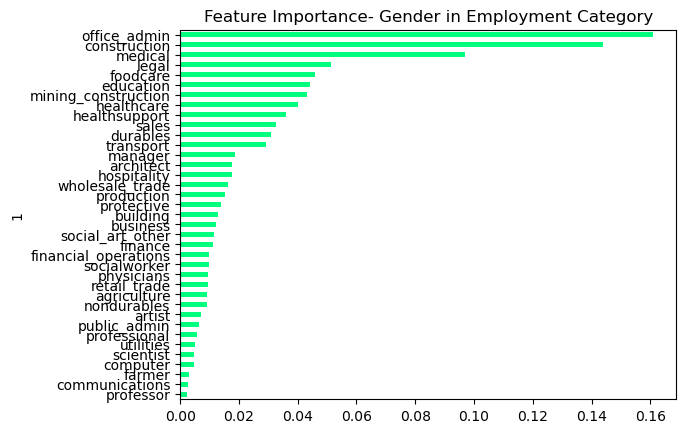

In [10]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='springgreen', title= 'Feature Importance- Gender in Employment Category', legend=False)

In [11]:
# Drop the low value columns.
dropped_df2 = dropped_df.drop(['professor', 'communications', 'farmer', 'scientist', 'computer', 'utilities', 'professional', 'public_admin', 'artist', 'physicians', 'socialworker', 'financial_operations'], axis=1)
dropped_df

,gender,agriculture,mining_construction,durables,nondurables,transport,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
33394,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33395,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
33396,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [12]:
# Define features set
X = dropped_df2.copy()
X.drop("gender", axis=1, inplace=True)
X.head()

# Define target vector
y = dropped_df2["gender"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3029,1049
Actual 1,1051,3221


Accuracy Score : 0.7485029940119761
Classification Report
              precision    recall  f1-score   support

           1       0.74      0.74      0.74      4078
           2       0.75      0.75      0.75      4272

    accuracy                           0.75      8350
   macro avg       0.75      0.75      0.75      8350
weighted avg       0.75      0.75      0.75      8350



In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3029,1049
Actual 1,1051,3221


Accuracy Score : 0.7485029940119761
Classification Report
              precision    recall  f1-score   support

           1       0.74      0.74      0.74      4078
           2       0.75      0.75      0.75      4272

    accuracy                           0.75      8350
   macro avg       0.75      0.75      0.75      8350
weighted avg       0.75      0.75      0.75      8350



In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17251069377683398, 'office_admin'),
 (0.15776585316494093, 'construction'),
 (0.11048693279957209, 'medical'),
 (0.05640488009089382, 'legal'),
 (0.051852514239923986, 'foodcare'),
 (0.047844346190487226, 'education'),
 (0.04289939444426954, 'mining_construction'),
 (0.041932442576429, 'healthcare'),
 (0.036704557552595246, 'healthsupport'),
 (0.03577153582426991, 'sales'),
 (0.03445319502270668, 'durables'),
 (0.032518856564205646, 'transport'),
 (0.01892161572519353, 'hospitality'),
 (0.018309593713286578, 'wholesale_trade'),
 (0.017393557330753696, 'architect'),
 (0.017253918261695454, 'manager'),
 (0.013850844108364534, 'production'),
 (0.013278756406767437, 'protective'),
 (0.013202318385842004, 'social_art_other'),
 (0.011548066906101226, 'building'),
 (0.011491567758465776, 'finance'),
 (0.011188684466536387, 'agriculture'),
 (0.011029537992258228, 'retail_trade'),
 (0.010934792566602269, 'business'),
 (0.010451544131004728, 'nondurables')]

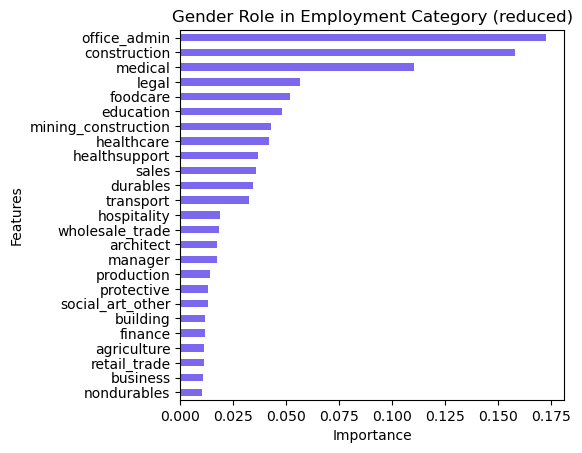

In [25]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='mediumslateblue', title= 'Gender Role in Employment Category (reduced)', legend=False)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.subplots_adjust(left=0.3)
plt.savefig('gender_role.png', dpi = 200)

In [16]:
plt.savefig('gender_role.png')

<Figure size 640x480 with 0 Axes>